In [17]:
import pandas as pd
from scipy.stats import ttest_rel

# Load the datasets
hr_bl01_path = '/Users/urmebose/Desktop/DM/hr.csv'
hr_tk01_path = '/Users/urmebose/Desktop/DM/hr_01.csv'

hr_bl01 = pd.read_csv(hr_bl01_path)
hr_tk01 = pd.read_csv(hr_tk01_path)

# Filter out zero heart rate values for accurate comparison
baseline_heart_rate = hr_bl01[hr_bl01['heart_rate'] > 0]['heart_rate']
test_heart_rate = hr_tk01[hr_tk01['heart_rate'] > 0]['heart_rate']

# Calculate averages
avg_hr_baseline = baseline_heart_rate.mean()
avg_hr_test = test_heart_rate.mean()

# Perform paired t-test
paired_t_stat, paired_p_value = ttest_rel(baseline_heart_rate, test_heart_rate[:len(baseline_heart_rate)])

# Calculate percentage increase
percentage_increase = ((avg_hr_test - avg_hr_baseline) / avg_hr_baseline) * 100

# Display results
results = {
    'Average Heart Rate - Baseline': avg_hr_baseline,
    'Average Heart Rate - Test': avg_hr_test,
    'Paired T-Test Statistic': paired_t_stat,
    'Paired T-Test P-Value': paired_p_value,
    'Percentage Increase in Heart Rate': percentage_increase
}

results

{'Average Heart Rate - Baseline': 99.20398912058023,
 'Average Heart Rate - Test': 96.00773830460781,
 'Paired T-Test Statistic': 6.222947045654469,
 'Paired T-Test P-Value': 6.920350110807487e-10,
 'Percentage Increase in Heart Rate': -3.2218974703602377}

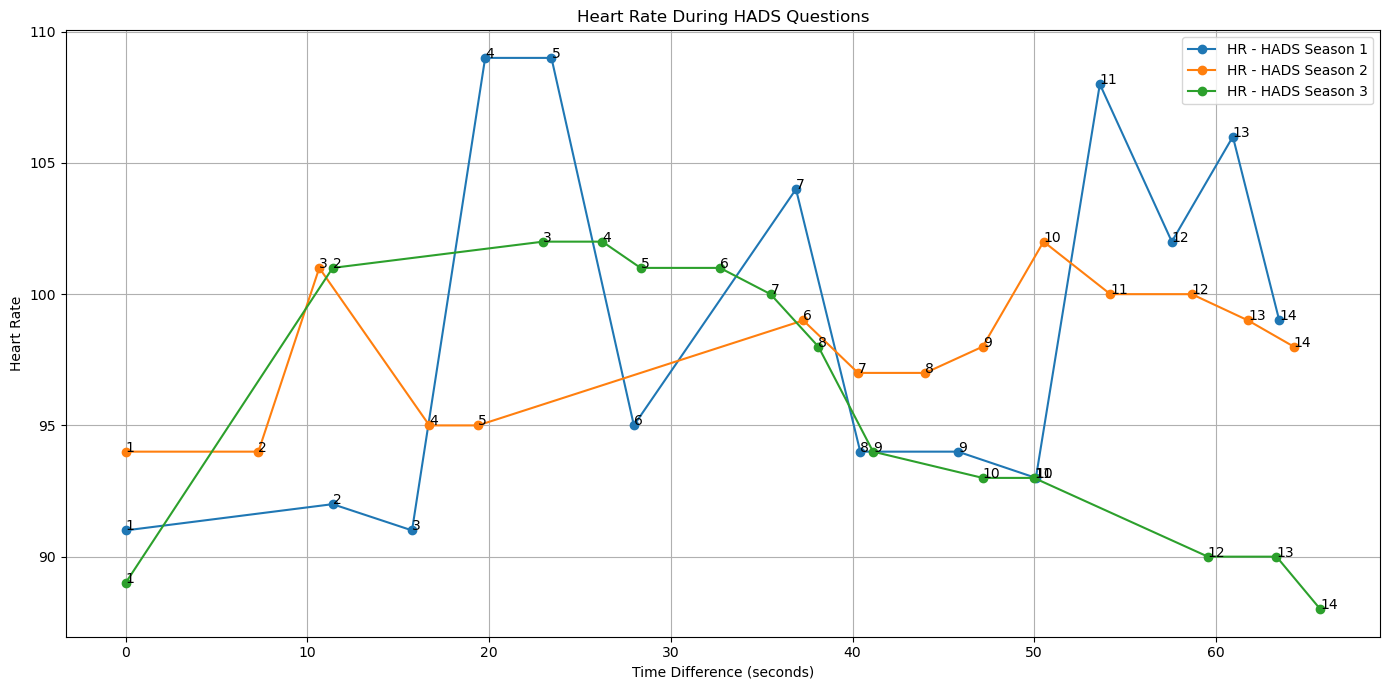

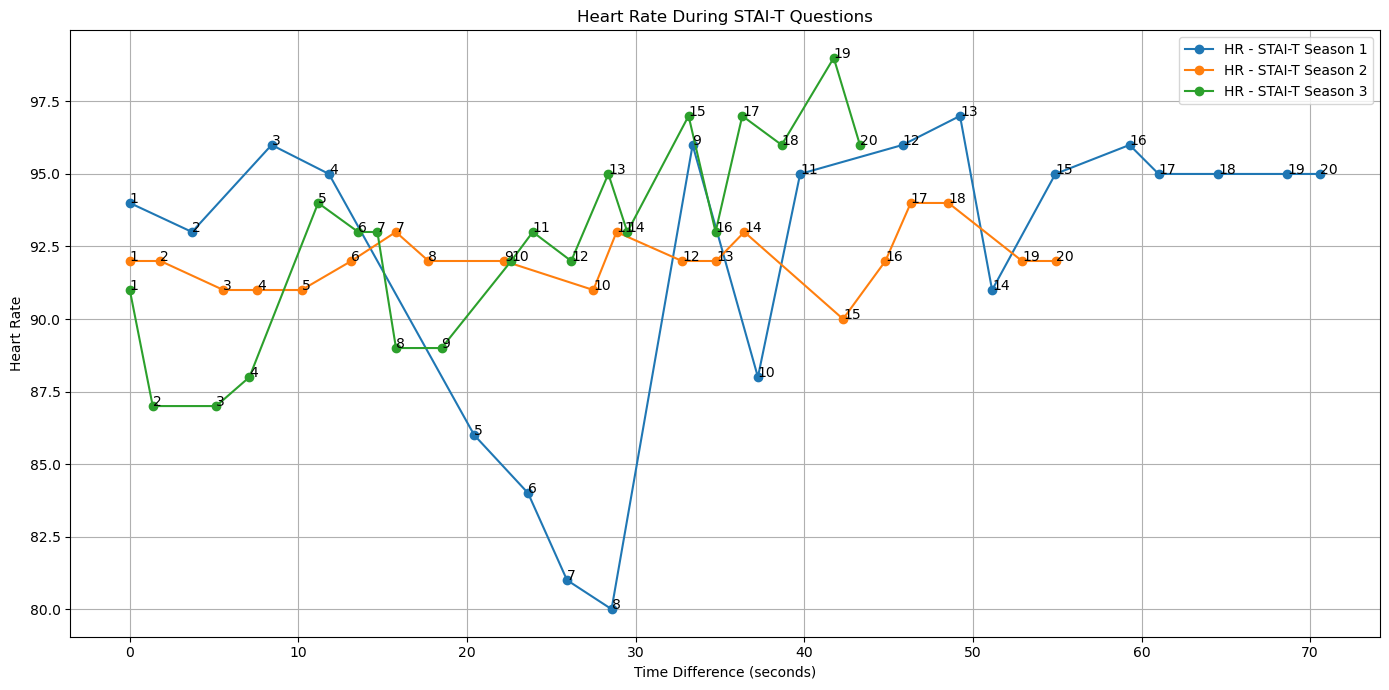

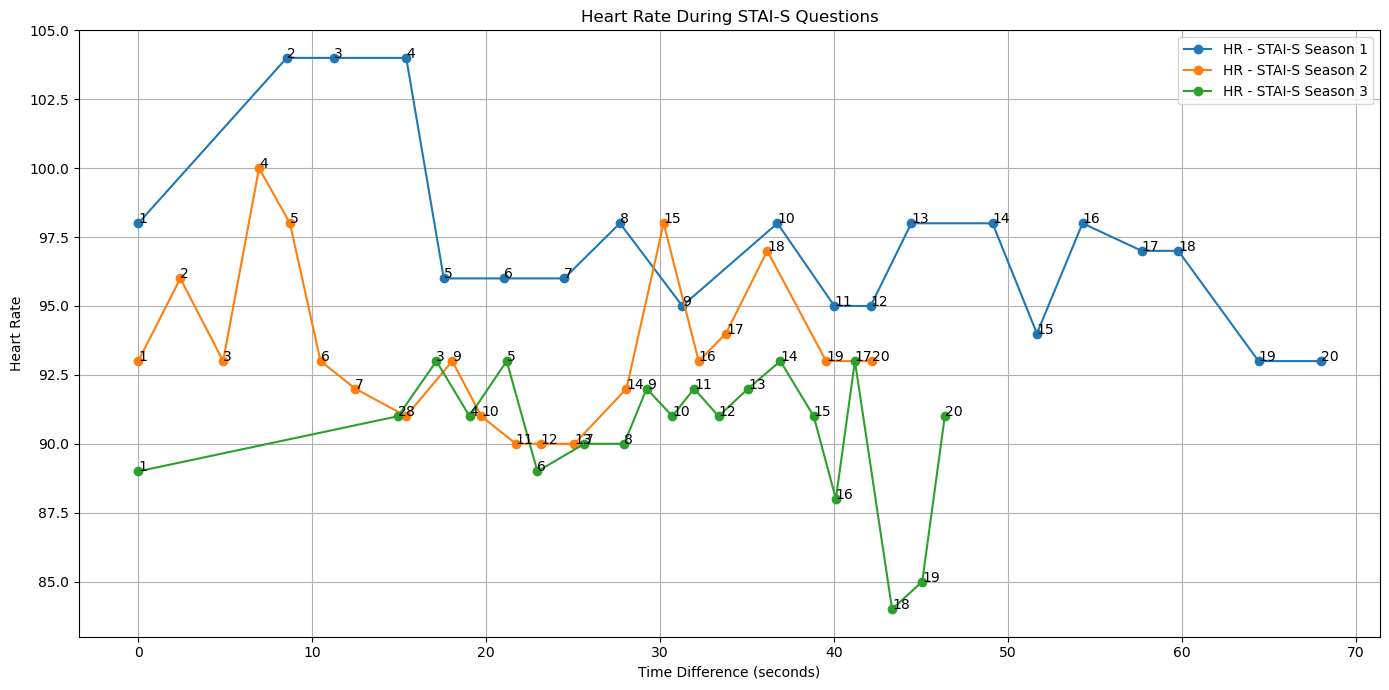

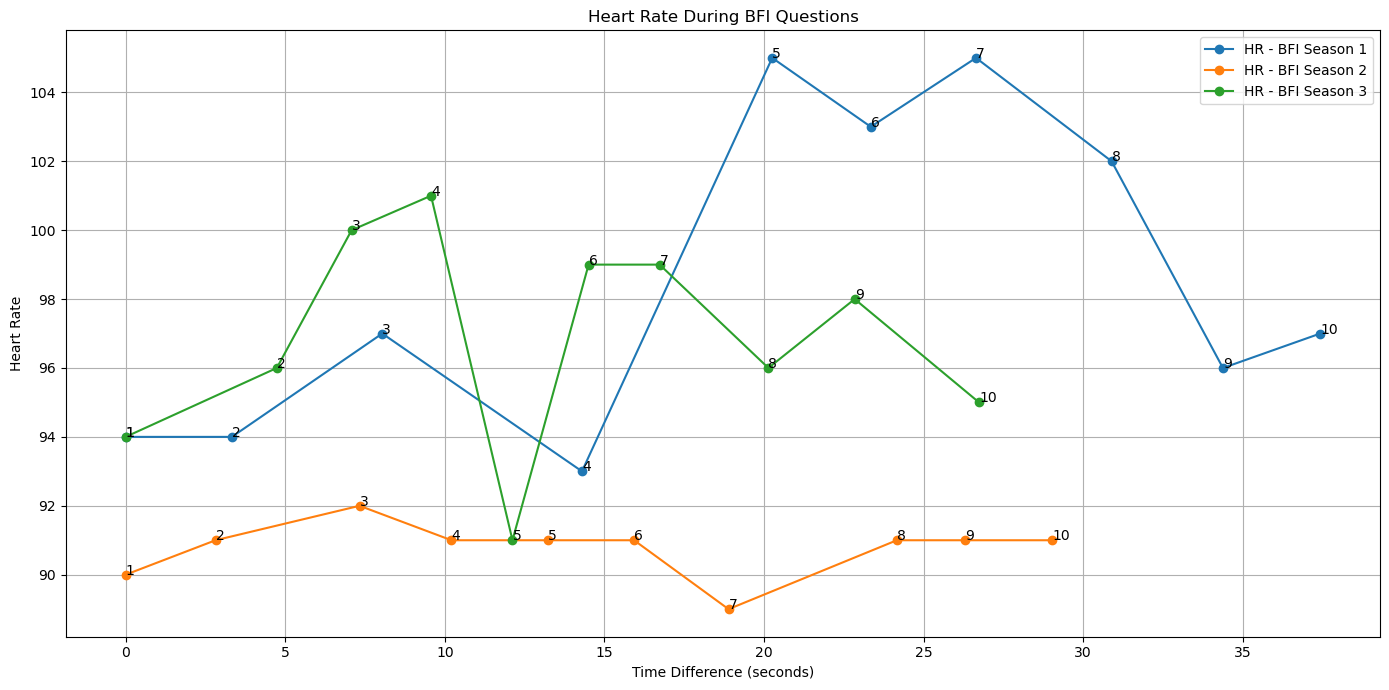

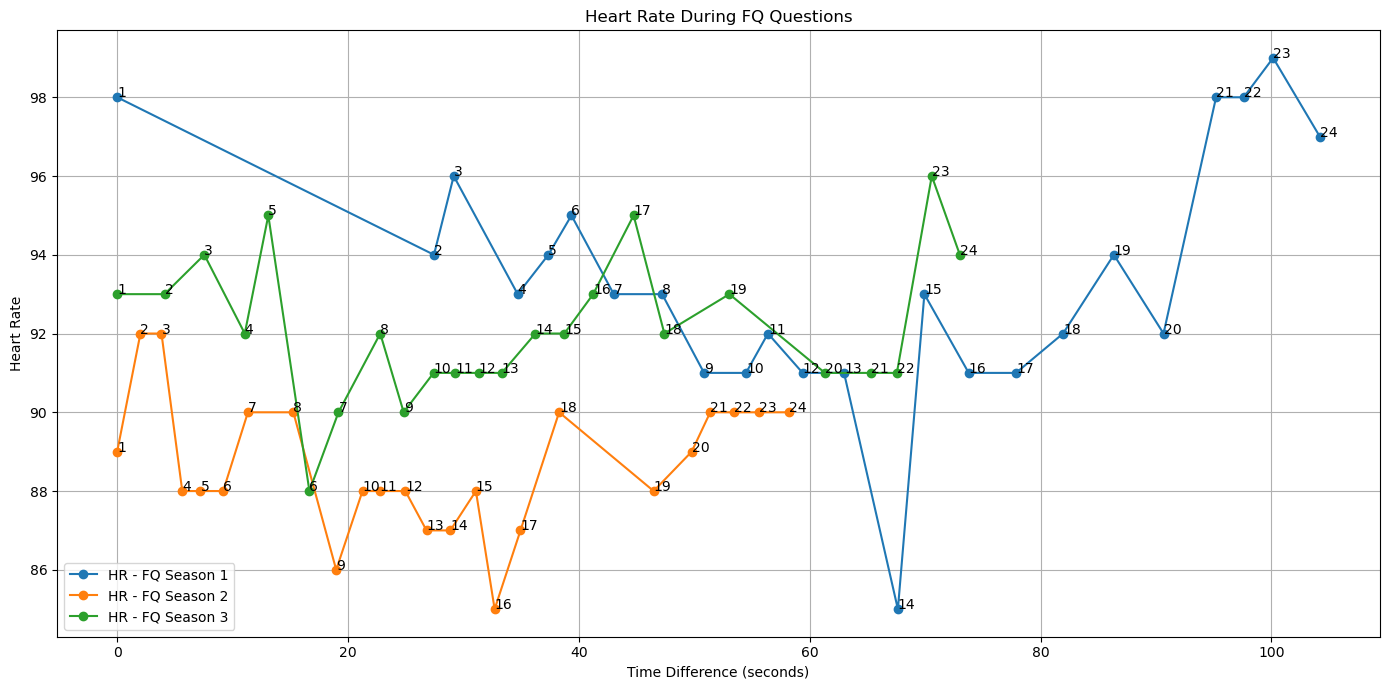

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the HR and psychometric test data for three seasons
hr_01 = pd.read_csv('/Users/urmebose/Desktop/DM/hr_01.csv')
hr_02 = pd.read_csv('/Users/urmebose/Desktop/DM/hr_02.csv')
hr_03 = pd.read_csv('/Users/urmebose/Desktop/DM/hr_03.csv')
psychometric_01 = pd.read_csv('/Users/urmebose/Desktop/DM/Psychometric_Test_Results_01.csv')
psychometric_02 = pd.read_csv('/Users/urmebose/Desktop/DM/Psychometric_Test_Results_02.csv')
psychometric_03 = pd.read_csv('/Users/urmebose/Desktop/DM/Psychometric_Test_Results_03.csv')

# Clean and prepare the psychometric data
# Rename columns for easier access
psychometric_01.columns = ['Type', 'Test', 'Question', 'Answer', 'Time(s)', 'Question Start Time', 'Question Answer Time']
psychometric_02.columns = ['Type', 'Test', 'Question', 'Answer', 'Time(s)', 'Question Start Time', 'Question Answer Time']
psychometric_03.columns = ['Type', 'Test', 'Question', 'Answer', 'Time(s)', 'Question Start Time', 'Question Answer Time']

# Convert 'datetime' columns to datetime format and ensure they are tz-naive
hr_01['datetime'] = pd.to_datetime(hr_01['datetime']).dt.tz_localize(None)
hr_02['datetime'] = pd.to_datetime(hr_02['datetime']).dt.tz_localize(None)
hr_03['datetime'] = pd.to_datetime(hr_03['datetime']).dt.tz_localize(None)
psychometric_01['Question Start Time'] = pd.to_datetime(psychometric_01['Question Start Time']).dt.tz_localize(None)
psychometric_02['Question Start Time'] = pd.to_datetime(psychometric_02['Question Start Time']).dt.tz_localize(None)
psychometric_03['Question Start Time'] = pd.to_datetime(psychometric_03['Question Start Time']).dt.tz_localize(None)

# Define the question types
question_types = ['HADS', 'STAI-T', 'STAI-S', 'BFI', 'FQ']

# Organize psychometric data by question types for three seasons
psychometric_data = {
    'HADS': (
        psychometric_01[psychometric_01['Type'] == 'HADS'].reset_index(drop=True),
        psychometric_02[psychometric_02['Type'] == 'HADS'].reset_index(drop=True),
        psychometric_03[psychometric_03['Type'] == 'HADS'].reset_index(drop=True)
    ),
    'STAI-T': (
        psychometric_01[psychometric_01['Type'] == 'STAI-T'].reset_index(drop=True),
        psychometric_02[psychometric_02['Type'] == 'STAI-T'].reset_index(drop=True),
        psychometric_03[psychometric_03['Type'] == 'STAI-T'].reset_index(drop=True)
    ),
    'STAI-S': (
        psychometric_01[psychometric_01['Type'] == 'STAI-S'].reset_index(drop=True),
        psychometric_02[psychometric_02['Type'] == 'STAI-S'].reset_index(drop=True),
        psychometric_03[psychometric_03['Type'] == 'STAI-S'].reset_index(drop=True)
    ),
    'BFI': (
        psychometric_01[psychometric_01['Type'] == 'BFI'].reset_index(drop=True),
        psychometric_02[psychometric_02['Type'] == 'BFI'].reset_index(drop=True),
        psychometric_03[psychometric_03['Type'] == 'BFI'].reset_index(drop=True)
    ),
    'FQ': (
        psychometric_01[psychometric_01['Type'] == 'FQ'].reset_index(drop=True),
        psychometric_02[psychometric_02['Type'] == 'FQ'].reset_index(drop=True),
        psychometric_03[psychometric_03['Type'] == 'FQ'].reset_index(drop=True)
    )
}

def process_and_plot(type_key):
    data_01, data_02, data_03 = psychometric_data[type_key]
    
    # Merge the psychometric data with heart rate data based on the closest timestamp
    data_01['closest_hr'] = data_01['Question Start Time'].apply(
        lambda x: hr_01.iloc[(hr_01['datetime'] - x).abs().argsort()[:1]]['heart_rate'].values[0])
    data_02['closest_hr'] = data_02['Question Start Time'].apply(
        lambda x: hr_02.iloc[(hr_02['datetime'] - x).abs().argsort()[:1]]['heart_rate'].values[0])
    data_03['closest_hr'] = data_03['Question Start Time'].apply(
        lambda x: hr_03.iloc[(hr_03['datetime'] - x).abs().argsort()[:1]]['heart_rate'].values[0])

    # Extract question numbers
    data_01['Question Number'] = data_01['Test'].str.extract(r'(\d+)').astype(int)
    data_02['Question Number'] = data_02['Test'].str.extract(r'(\d+)').astype(int)
    data_03['Question Number'] = data_03['Test'].str.extract(r'(\d+)').astype(int)

    # Create time difference
    data_01['Time Difference'] = (data_01['Question Start Time'] - data_01['Question Start Time'].min()).dt.total_seconds()
    data_02['Time Difference'] = (data_02['Question Start Time'] - data_02['Question Start Time'].min()).dt.total_seconds()
    data_03['Time Difference'] = (data_03['Question Start Time'] - data_03['Question Start Time'].min()).dt.total_seconds()

    # Plot the data
    plt.figure(figsize=(14, 7))
    plt.plot(data_01['Time Difference'], data_01['closest_hr'], label=f'HR - {type_key} Season 1', marker='o')
    plt.plot(data_02['Time Difference'], data_02['closest_hr'], label=f'HR - {type_key} Season 2', marker='o')
    plt.plot(data_03['Time Difference'], data_03['closest_hr'], label=f'HR - {type_key} Season 3', marker='o')

    # Annotate the questions
    for i in range(len(data_01)):
        plt.annotate(data_01['Question Number'][i].item(), (data_01['Time Difference'][i], data_01['closest_hr'][i]))

    for i in range(len(data_02)):
        plt.annotate(data_02['Question Number'][i].item(), (data_02['Time Difference'][i], data_02['closest_hr'][i]))

    for i in range(len(data_03)):
        plt.annotate(data_03['Question Number'][i].item(), (data_03['Time Difference'][i], data_03['closest_hr'][i]))

    plt.title(f'Heart Rate During {type_key} Questions')
    plt.xlabel('Time Difference (seconds)')
    plt.ylabel('Heart Rate')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Show the plot
    plt.show()

# Process and plot each type for three seasons
for q_type in question_types:
    process_and_plot(q_type)

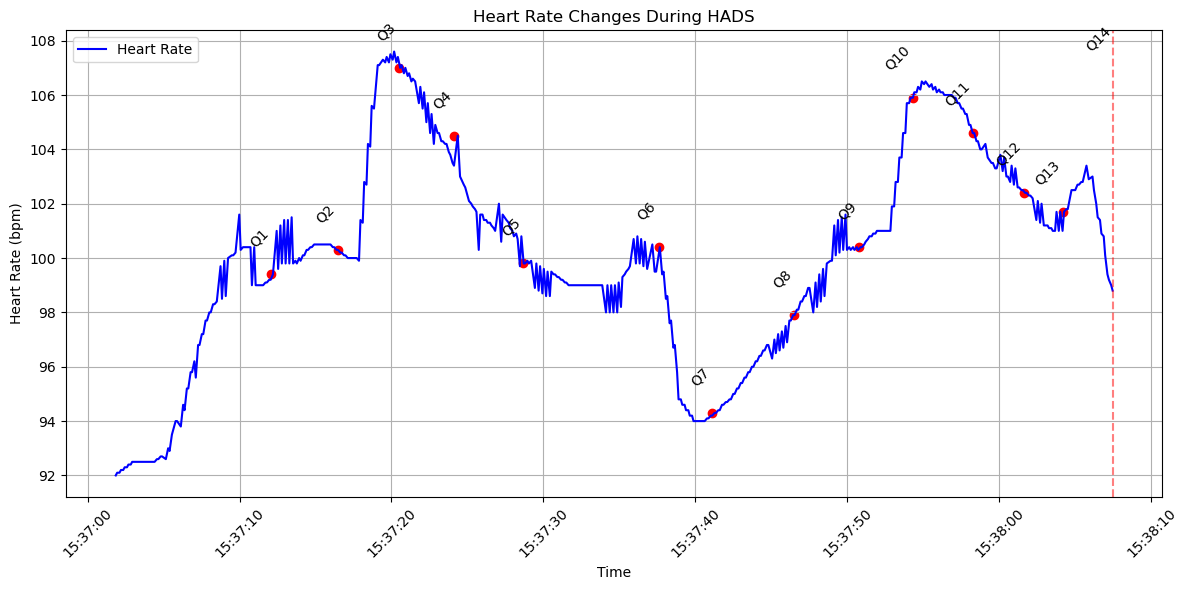

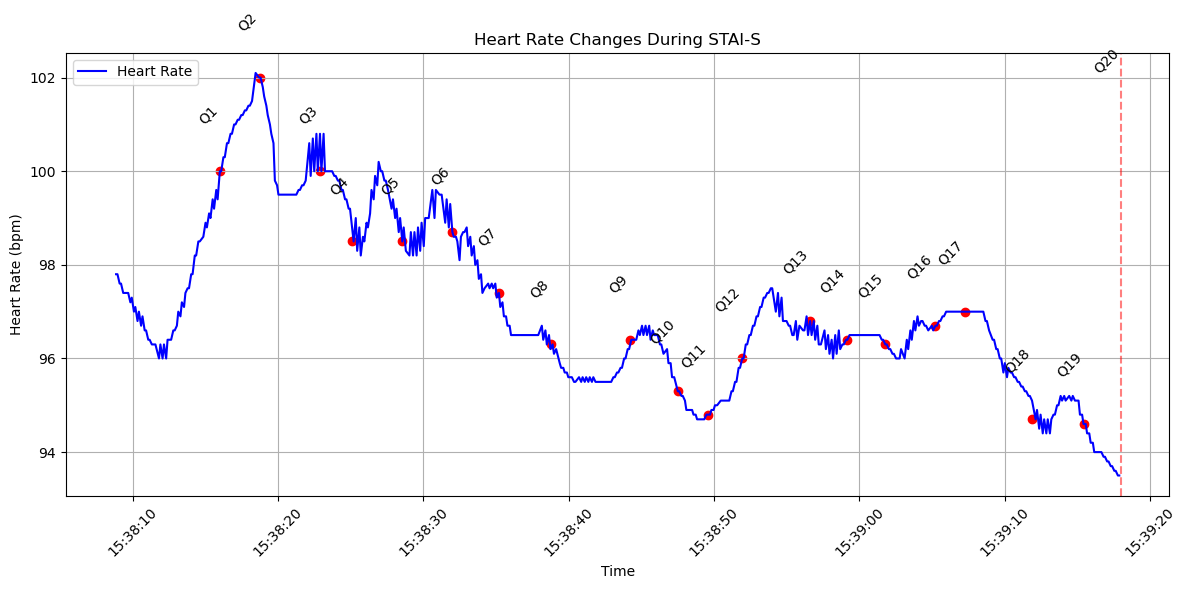

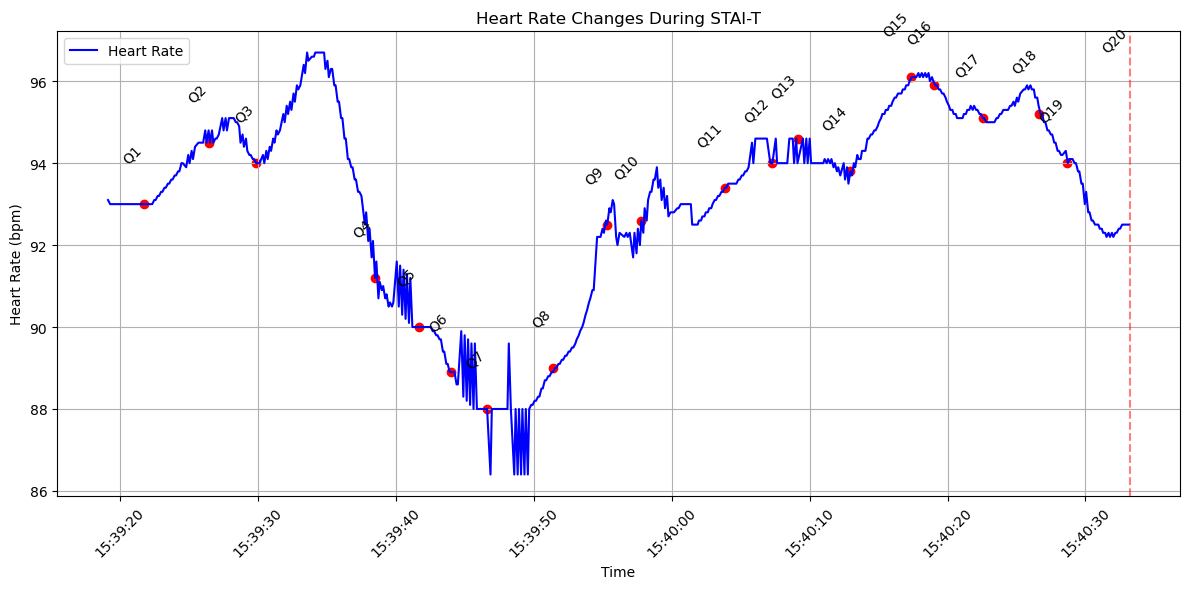

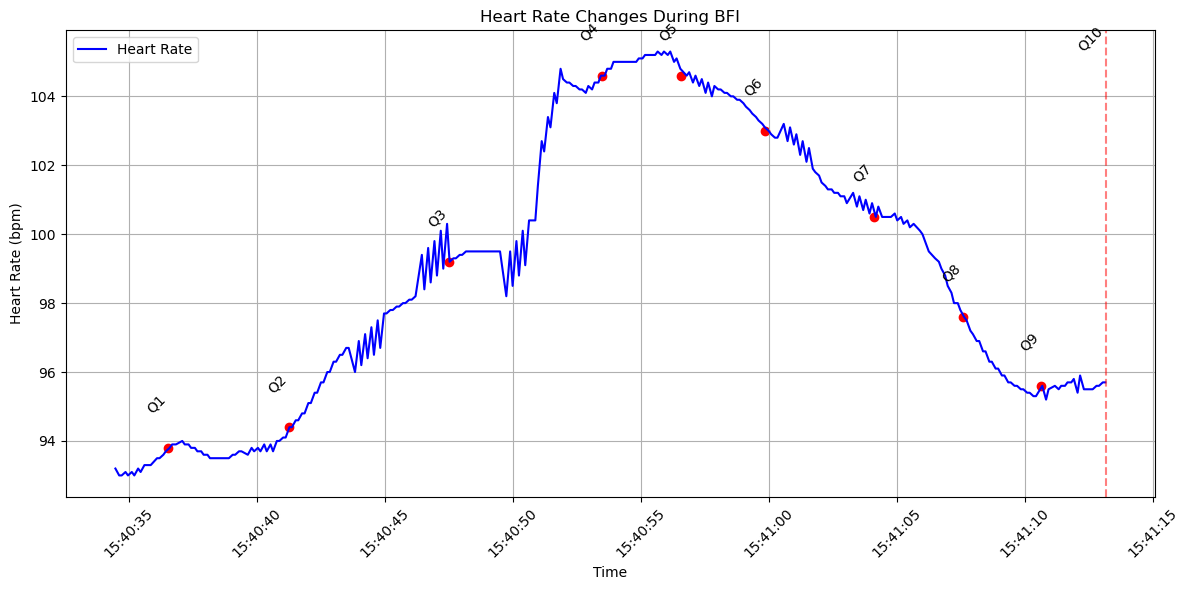

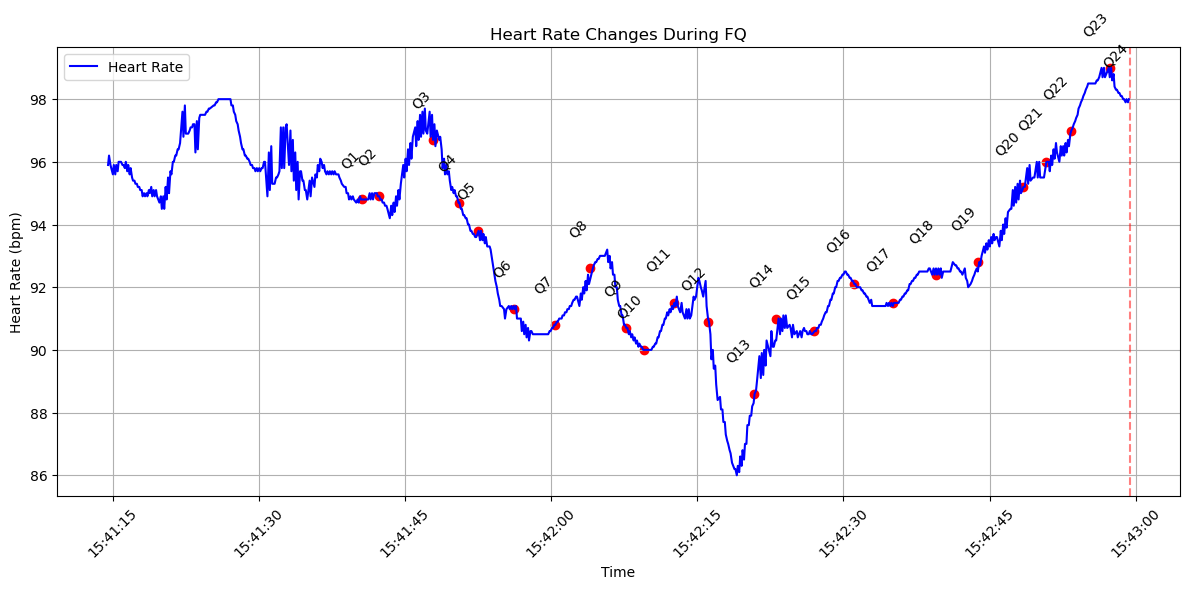

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the heart rate data
hr_data_path = '/Users/urmebose/Desktop/DM/hr_01.csv'
hr_data = pd.read_csv(hr_data_path, delimiter=',')

# Convert datetime formats in heart rate data
hr_data['datetime'] = pd.to_datetime(hr_data['datetime'], format='%Y/%m/%d %H:%M:%S.%f')

# Ensure heart rate data is timezone-naive
hr_data['datetime'] = hr_data['datetime'].dt.tz_localize(None)

# Load the psychometric test data
psychometric_test_path = '/Users/urmebose/Desktop/DM/Psychometric_Test_Results_01.csv'
psychometric_data = pd.read_csv(psychometric_test_path)

def plot_heart_rate_for_category(category_name, expected_questions, window_size=10):
    # Filter the psychometric data for the given category
    category_data = psychometric_data[psychometric_data['data:text/csv;charset=utf-8'] == category_name].copy()

    # Ensure the datetime columns are correctly formatted and timezone-naive
    category_data['Question Start Time'] = pd.to_datetime(category_data['Question Start Time']).dt.tz_localize(None)
    category_data['Question Answer Time'] = pd.to_datetime(category_data['Question Answer Time']).dt.tz_localize(None)

    # Filter heart rate data to match the category times correctly
    category_hr_data = pd.DataFrame()
    question_times = []  # Reset the list to collect times each question was answered

    # Adjust filtering logic to check and collect the data correctly
    for index, row in category_data.iterrows():
        start_time = row['Question Start Time']
        end_time = row['Question Answer Time']
        mask = (hr_data['datetime'] >= start_time) & (hr_data['datetime'] <= end_time)
        segment = hr_data.loc[mask]
        if not segment.empty:
            category_hr_data = pd.concat([category_hr_data, segment])
        question_times.append(end_time)  # Collect the time each question was answered

    # Check if we have the expected number of questions
    if len(question_times) != expected_questions:
        print(f"Warning: {category_name} has {len(question_times)} questions, expected {expected_questions}")

    # Sort the filtered data by datetime
    category_hr_data.sort_values(by='datetime', inplace=True)
    category_hr_data.reset_index(drop=True, inplace=True)  # Reset index for clean plotting

    # Smooth the heart rate data using a moving average
    category_hr_data['smoothed_heart_rate'] = category_hr_data['heart_rate'].rolling(window=window_size).mean()

    # Prepare to plot
    plt.figure(figsize=(12, 6))
    plt.plot(category_hr_data['datetime'], category_hr_data['smoothed_heart_rate'], label='Heart Rate', color='b')

    # Mark each question's answer time with scatter points
    for i, time in enumerate(question_times, start=1):
        nearest_idx = category_hr_data['datetime'].searchsorted(time)
        if nearest_idx < len(category_hr_data):
            hr_at_time = category_hr_data.iloc[nearest_idx]['smoothed_heart_rate']
            plt.scatter(time, hr_at_time, color='red')
            plt.text(time, hr_at_time + 1, f'Q{i}', rotation=45, ha='right')
        else:
            plt.axvline(x=time, color='red', linestyle='--', alpha=0.5)
            plt.text(time, category_hr_data['smoothed_heart_rate'].max(), f'Q{i}', rotation=45, ha='right')

    plt.xlabel('Time')
    plt.ylabel('Heart Rate (bpm)')
    plt.title(f'Heart Rate Changes During {category_name}')
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot for each category
plot_heart_rate_for_category('HADS', 14)
plot_heart_rate_for_category('STAI-S', 20)
plot_heart_rate_for_category('STAI-T', 20)
plot_heart_rate_for_category('BFI', 10)
plot_heart_rate_for_category('FQ', 24)

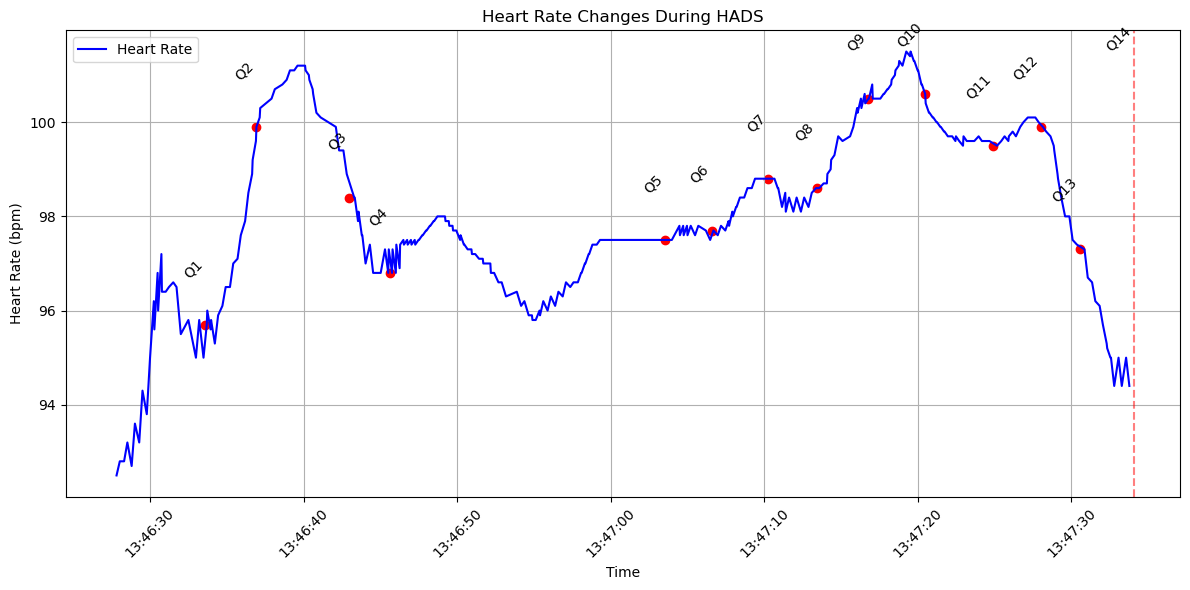

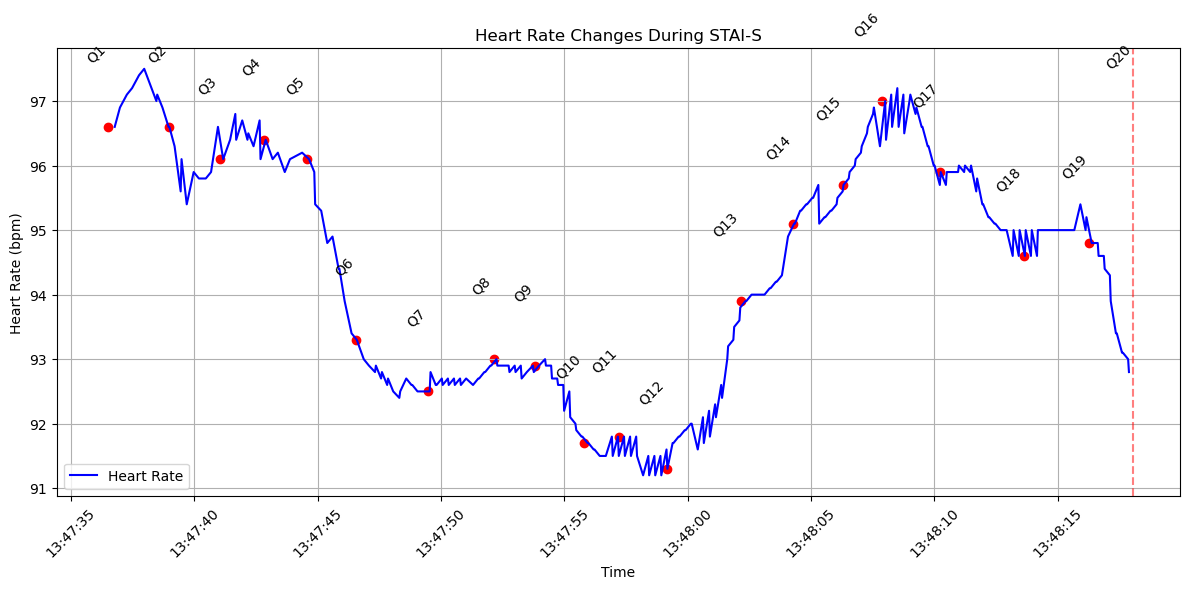

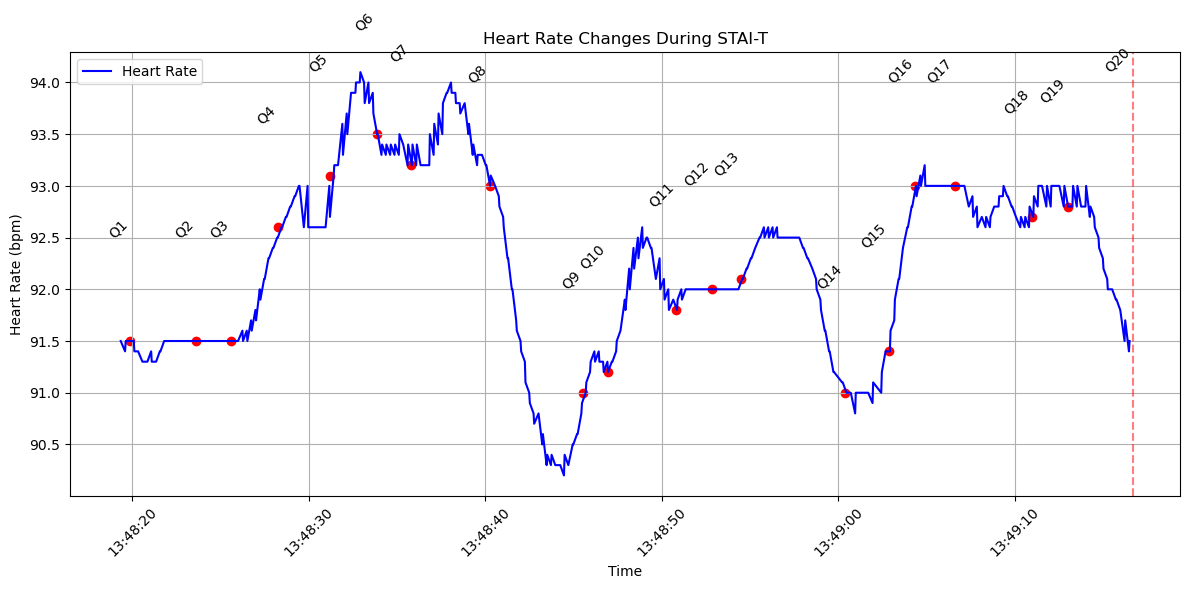

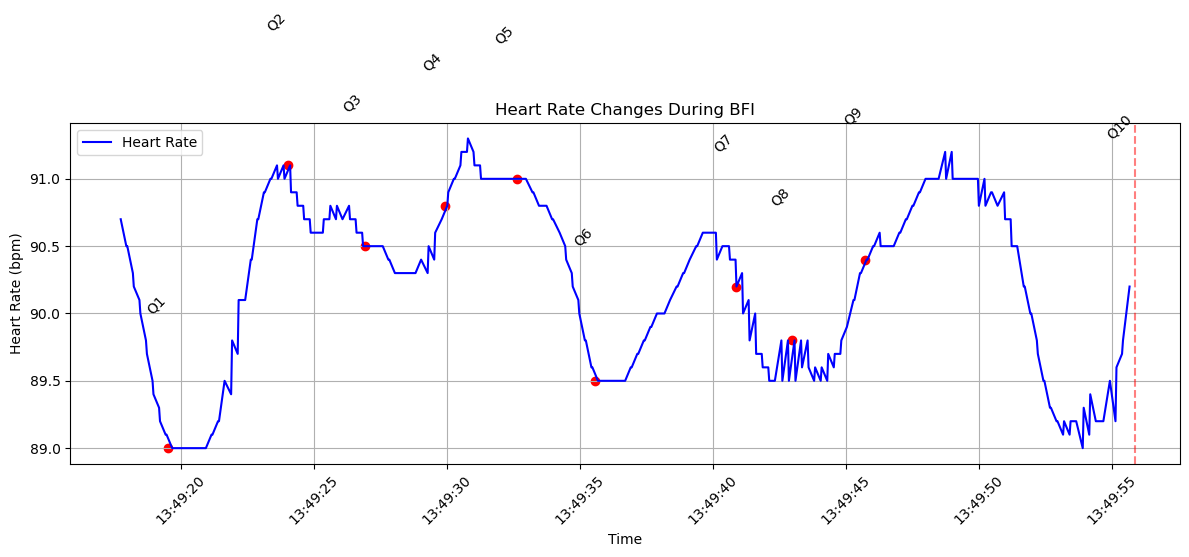

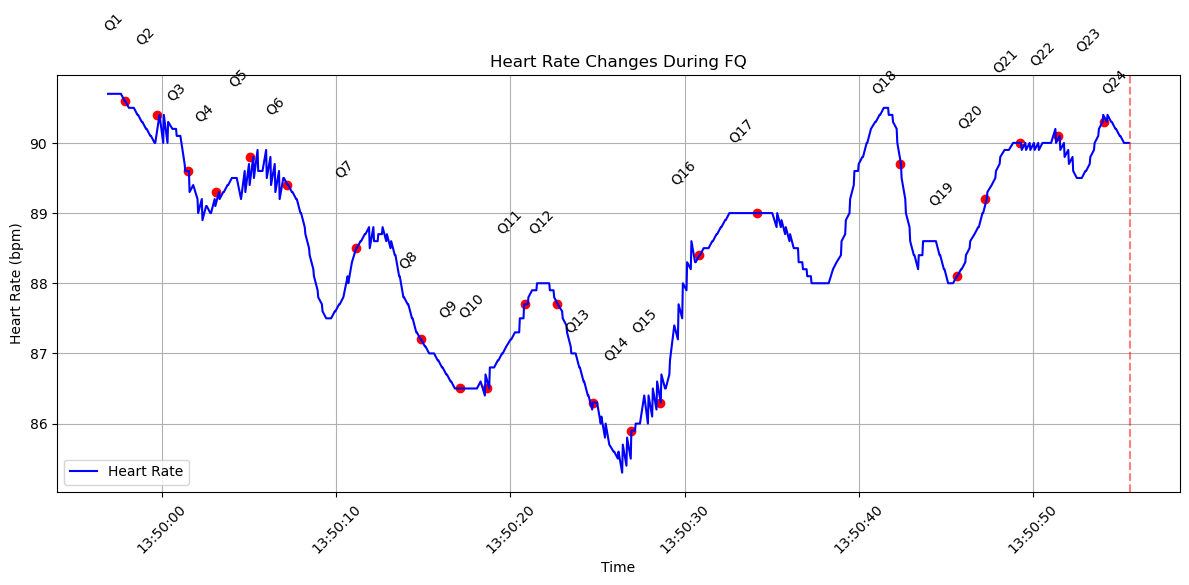

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the heart rate data
hr_data_path = '/Users/urmebose/Desktop/DM/hr_02.csv'
hr_data = pd.read_csv(hr_data_path, delimiter=',')

# Convert datetime formats in heart rate data
hr_data['datetime'] = pd.to_datetime(hr_data['datetime'], format='%Y/%m/%d %H:%M:%S.%f')

# Ensure heart rate data is timezone-naive
hr_data['datetime'] = hr_data['datetime'].dt.tz_localize(None)

# Load the psychometric test data
psychometric_test_path = '/Users/urmebose/Desktop/DM/Psychometric_Test_Results_02.csv'
psychometric_data = pd.read_csv(psychometric_test_path)

def plot_heart_rate_for_category(category_name, expected_questions, window_size=10):
    # Filter the psychometric data for the given category
    category_data = psychometric_data[psychometric_data['data:text/csv;charset=utf-8'] == category_name].copy()

    # Ensure the datetime columns are correctly formatted and timezone-naive
    category_data['Question Start Time'] = pd.to_datetime(category_data['Question Start Time']).dt.tz_localize(None)
    category_data['Question Answer Time'] = pd.to_datetime(category_data['Question Answer Time']).dt.tz_localize(None)

    # Filter heart rate data to match the category times correctly
    category_hr_data = pd.DataFrame()
    question_times = []  # Reset the list to collect times each question was answered

    # Adjust filtering logic to check and collect the data correctly
    for index, row in category_data.iterrows():
        start_time = row['Question Start Time']
        end_time = row['Question Answer Time']
        mask = (hr_data['datetime'] >= start_time) & (hr_data['datetime'] <= end_time)
        segment = hr_data.loc[mask]
        if not segment.empty:
            category_hr_data = pd.concat([category_hr_data, segment])
        question_times.append(end_time)  # Collect the time each question was answered

    # Check if we have the expected number of questions
    if len(question_times) != expected_questions:
        print(f"Warning: {category_name} has {len(question_times)} questions, expected {expected_questions}")

    # Sort the filtered data by datetime
    category_hr_data.sort_values(by='datetime', inplace=True)
    category_hr_data.reset_index(drop=True, inplace=True)  # Reset index for clean plotting

    # Smooth the heart rate data using a moving average
    category_hr_data['smoothed_heart_rate'] = category_hr_data['heart_rate'].rolling(window=window_size).mean()

    # Prepare to plot
    plt.figure(figsize=(12, 6))
    plt.plot(category_hr_data['datetime'], category_hr_data['smoothed_heart_rate'], label='Heart Rate', color='b')

    # Mark each question's answer time with scatter points
    for i, time in enumerate(question_times, start=1):
        nearest_idx = category_hr_data['datetime'].searchsorted(time)
        if nearest_idx < len(category_hr_data):
            hr_at_time = category_hr_data.iloc[nearest_idx]['smoothed_heart_rate']
            plt.scatter(time, hr_at_time, color='red')
            plt.text(time, hr_at_time + 1, f'Q{i}', rotation=45, ha='right')
        else:
            plt.axvline(x=time, color='red', linestyle='--', alpha=0.5)
            plt.text(time, category_hr_data['smoothed_heart_rate'].max(), f'Q{i}', rotation=45, ha='right')

    plt.xlabel('Time')
    plt.ylabel('Heart Rate (bpm)')
    plt.title(f'Heart Rate Changes During {category_name}')
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot for each category
plot_heart_rate_for_category('HADS', 14)
plot_heart_rate_for_category('STAI-S', 20)
plot_heart_rate_for_category('STAI-T', 20)
plot_heart_rate_for_category('BFI', 10)
plot_heart_rate_for_category('FQ', 24)

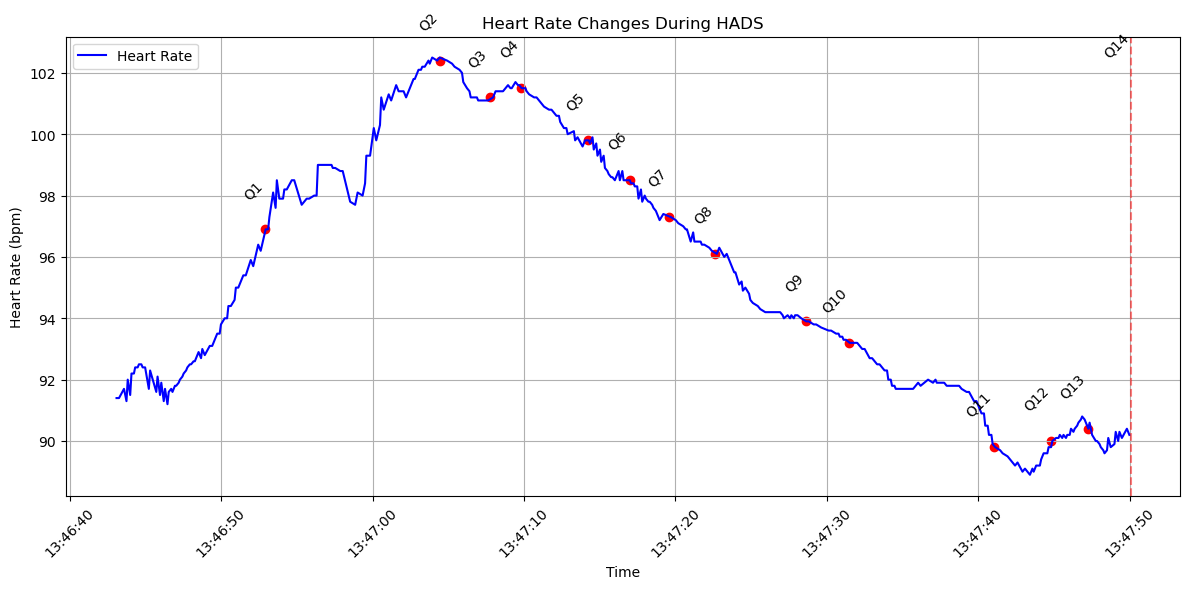

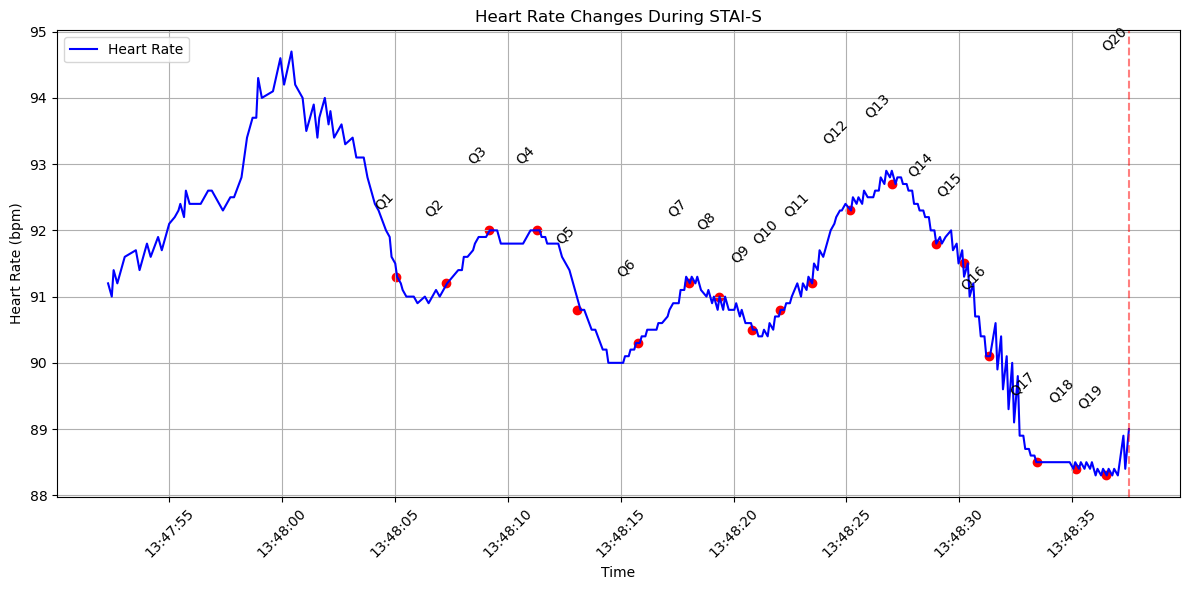

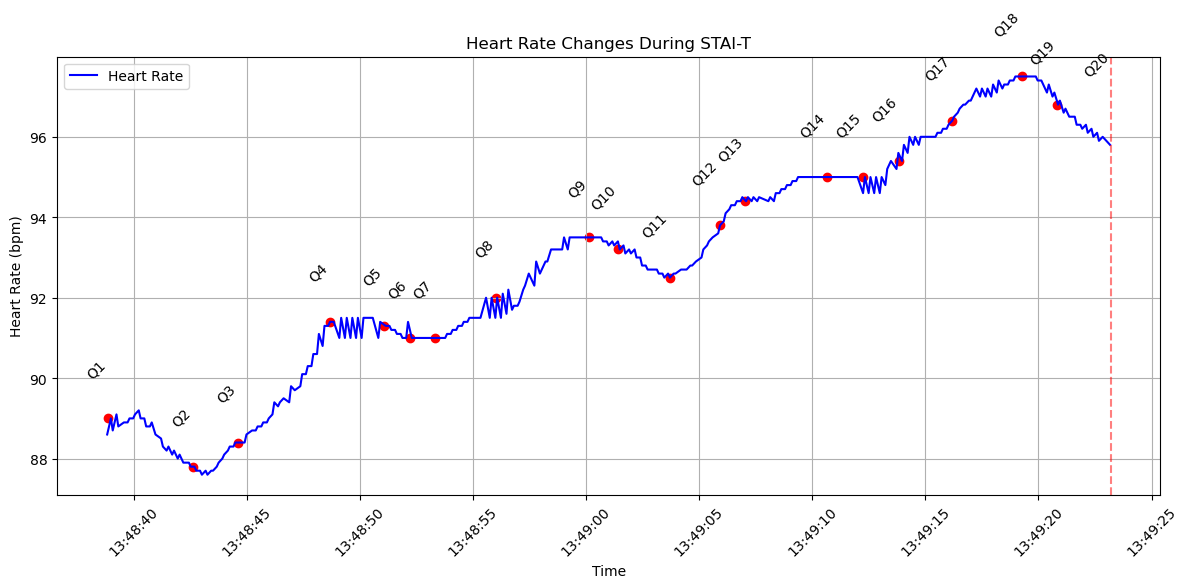

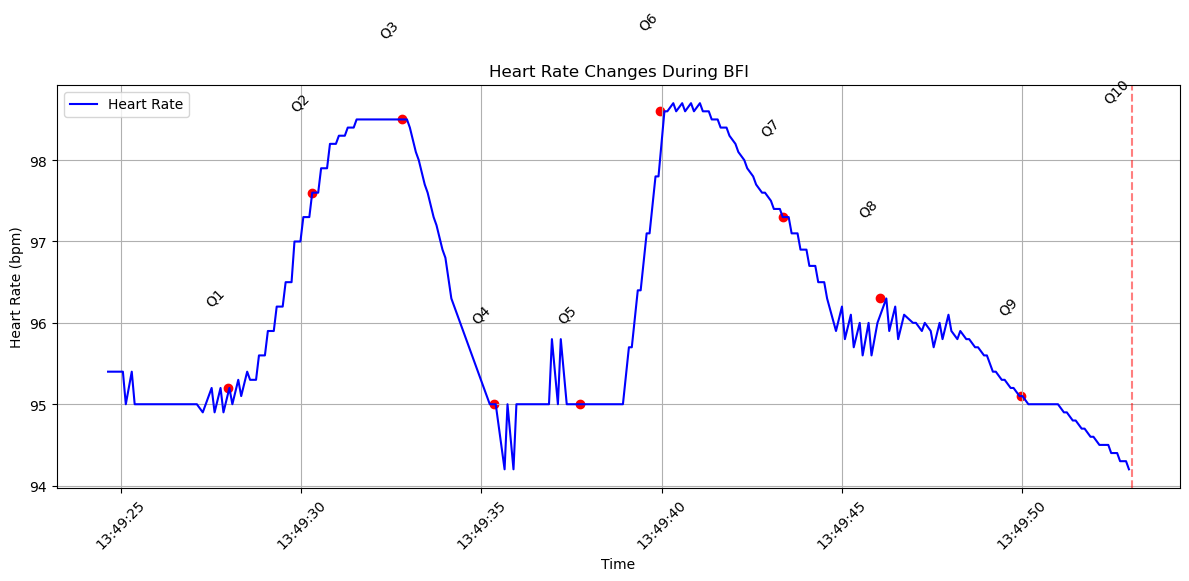

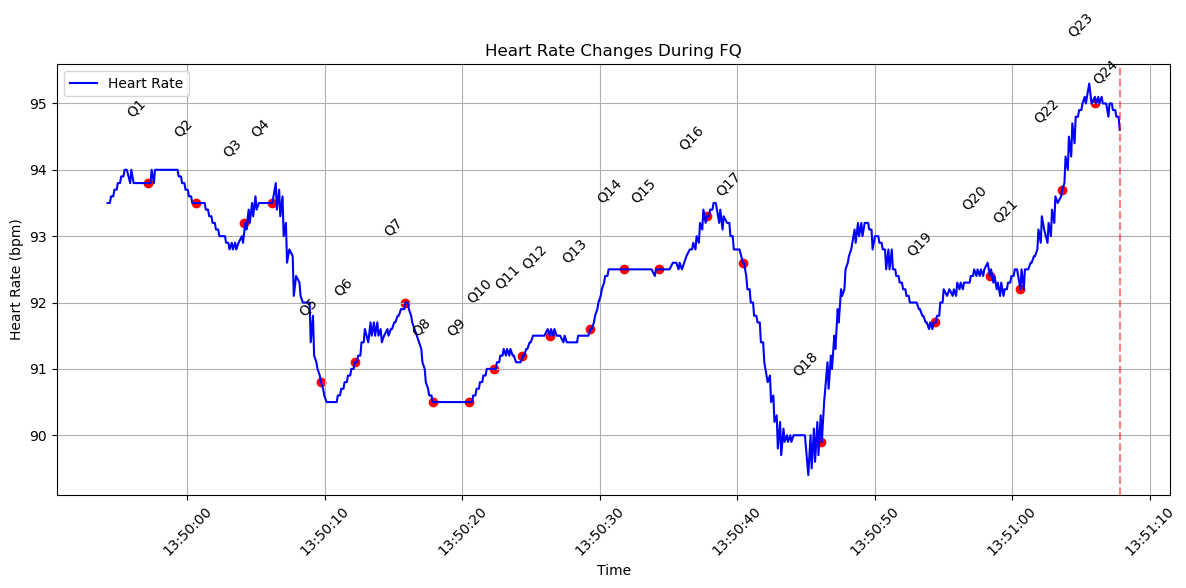

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the heart rate data
hr_data_path = '/Users/urmebose/Desktop/DM/hr_03.csv'
hr_data = pd.read_csv(hr_data_path, delimiter=',')

# Convert datetime formats in heart rate data
hr_data['datetime'] = pd.to_datetime(hr_data['datetime'], format='%Y/%m/%d %H:%M:%S.%f')

# Ensure heart rate data is timezone-naive
hr_data['datetime'] = hr_data['datetime'].dt.tz_localize(None)

# Load the psychometric test data
psychometric_test_path = '/Users/urmebose/Desktop/DM/Psychometric_Test_Results_03.csv'
psychometric_data = pd.read_csv(psychometric_test_path)

def plot_heart_rate_for_category(category_name, expected_questions, window_size=10):
    # Filter the psychometric data for the given category
    category_data = psychometric_data[psychometric_data['data:text/csv;charset=utf-8'] == category_name].copy()

    # Ensure the datetime columns are correctly formatted and timezone-naive
    category_data['Question Start Time'] = pd.to_datetime(category_data['Question Start Time']).dt.tz_localize(None)
    category_data['Question Answer Time'] = pd.to_datetime(category_data['Question Answer Time']).dt.tz_localize(None)

    # Filter heart rate data to match the category times correctly
    category_hr_data = pd.DataFrame()
    question_times = []  # Reset the list to collect times each question was answered

    # Adjust filtering logic to check and collect the data correctly
    for index, row in category_data.iterrows():
        start_time = row['Question Start Time']
        end_time = row['Question Answer Time']
        mask = (hr_data['datetime'] >= start_time) & (hr_data['datetime'] <= end_time)
        segment = hr_data.loc[mask]
        if not segment.empty:
            category_hr_data = pd.concat([category_hr_data, segment])
        question_times.append(end_time)  # Collect the time each question was answered

    # Check if we have the expected number of questions
    if len(question_times) != expected_questions:
        print(f"Warning: {category_name} has {len(question_times)} questions, expected {expected_questions}")

    # Sort the filtered data by datetime
    category_hr_data.sort_values(by='datetime', inplace=True)
    category_hr_data.reset_index(drop=True, inplace=True)  # Reset index for clean plotting

    # Smooth the heart rate data using a moving average
    category_hr_data['smoothed_heart_rate'] = category_hr_data['heart_rate'].rolling(window=window_size).mean()

    # Prepare to plot
    plt.figure(figsize=(12, 6))
    plt.plot(category_hr_data['datetime'], category_hr_data['smoothed_heart_rate'], label='Heart Rate', color='b')

    # Mark each question's answer time with scatter points
    for i, time in enumerate(question_times, start=1):
        nearest_idx = category_hr_data['datetime'].searchsorted(time)
        if nearest_idx < len(category_hr_data):
            hr_at_time = category_hr_data.iloc[nearest_idx]['smoothed_heart_rate']
            plt.scatter(time, hr_at_time, color='red')
            plt.text(time, hr_at_time + 1, f'Q{i}', rotation=45, ha='right')
        else:
            plt.axvline(x=time, color='red', linestyle='--', alpha=0.5)
            plt.text(time, category_hr_data['smoothed_heart_rate'].max(), f'Q{i}', rotation=45, ha='right')

    plt.xlabel('Time')
    plt.ylabel('Heart Rate (bpm)')
    plt.title(f'Heart Rate Changes During {category_name}')
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot for each category
plot_heart_rate_for_category('HADS', 14)
plot_heart_rate_for_category('STAI-S', 20)
plot_heart_rate_for_category('STAI-T', 20)
plot_heart_rate_for_category('BFI', 10)
plot_heart_rate_for_category('FQ', 24)